# IMOVE Time-Series and Big-Data Workshop
In this workshop we will use the time-series functionality of [Pandas](https://pandas.pydata.org/docs/) and [Xarray](http://xarray.pydata.org/en/stable/) to explore some data collected by the [Ocean Observatories Intiative](https://oceanobservatories.org/). Hopefully we will also get a chance to explore [Dask](https://docs.dask.org/en/latest/) and [Dask Delayed](https://docs.dask.org/en/latest/delayed.html) functions to parallelize a data analysis workflow in the cloud. We will be working on the [OOICloud](https://www.ooicloud.org/) [Pangeo](http://pangeo.io/) instance. Further information on using Python to analyze Earth science datasets can be found in the book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro) which I have been using to teach Research Computing in the Earth Sciences this semester.

## Bottom pressure data at Axial Seamount
Here we find data using the new OOI Data Explorer and use Pandas [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [time-series functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) to plot a smoothed representation of the bottom pressure at Axial Seamount. 

### First import some required packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)

In [2]:
from IPython import display
display.set_matplotlib_formats('retina')

### Next find some data on the OOI Data Explorer

In [4]:
url = 'http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-rs03int2-mj03d-06-botpta303.csv?time%2Cbotpres%2Cbotpres_qc_agg%2Cz&time%3E%3D2014-08-29T23%3A17%3A00Z&time%3C%3D2020-11-21T06%3A00%3A00Z'

In [5]:
url

'http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-rs03int2-mj03d-06-botpta303.csv?time%2Cbotpres%2Cbotpres_qc_agg%2Cz&time%3E%3D2014-08-29T23%3A17%3A00Z&time%3C%3D2020-11-21T06%3A00%3A00Z'

In [6]:
botpt = pd.read_csv(url, parse_dates=True, usecols = ['time','botpres'], index_col='time', skiprows=[1])
botpt.head()

,botpres
time,
2014-08-29 23:17:00+00:00,2259.326172
2014-08-29 23:18:00+00:00,2259.307617
2014-08-29 23:19:00+00:00,2259.294128
2014-08-29 23:20:00+00:00,2259.286011
2014-08-29 23:21:00+00:00,2259.281738


In [7]:
botpt = botpt.rename(columns={'botpres':'pressure'})

In [8]:
botpt.head()

,pressure
time,
2014-08-29 23:17:00+00:00,2259.326172
2014-08-29 23:18:00+00:00,2259.307617
2014-08-29 23:19:00+00:00,2259.294128
2014-08-29 23:20:00+00:00,2259.286011
2014-08-29 23:21:00+00:00,2259.281738


In [10]:
len(botpt)

3118375

<AxesSubplot:xlabel='time', ylabel='pressure'>

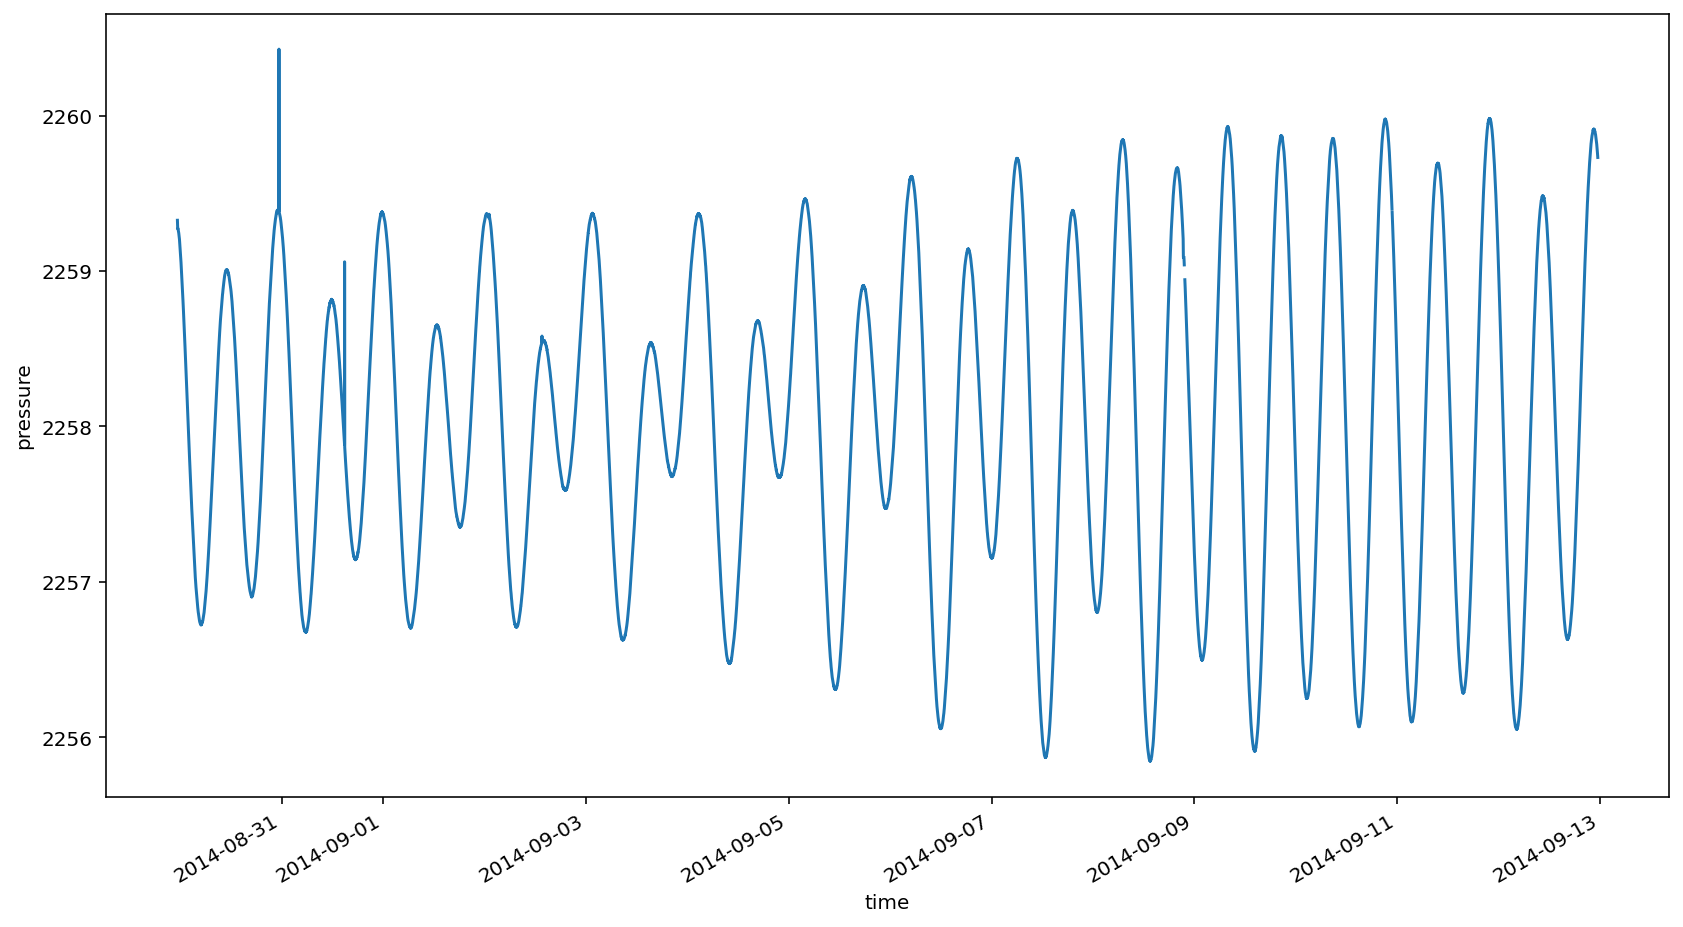

In [58]:
botpt[0:60*24*14].pressure.plot(ylabel='pressure')

<AxesSubplot:xlabel='time'>

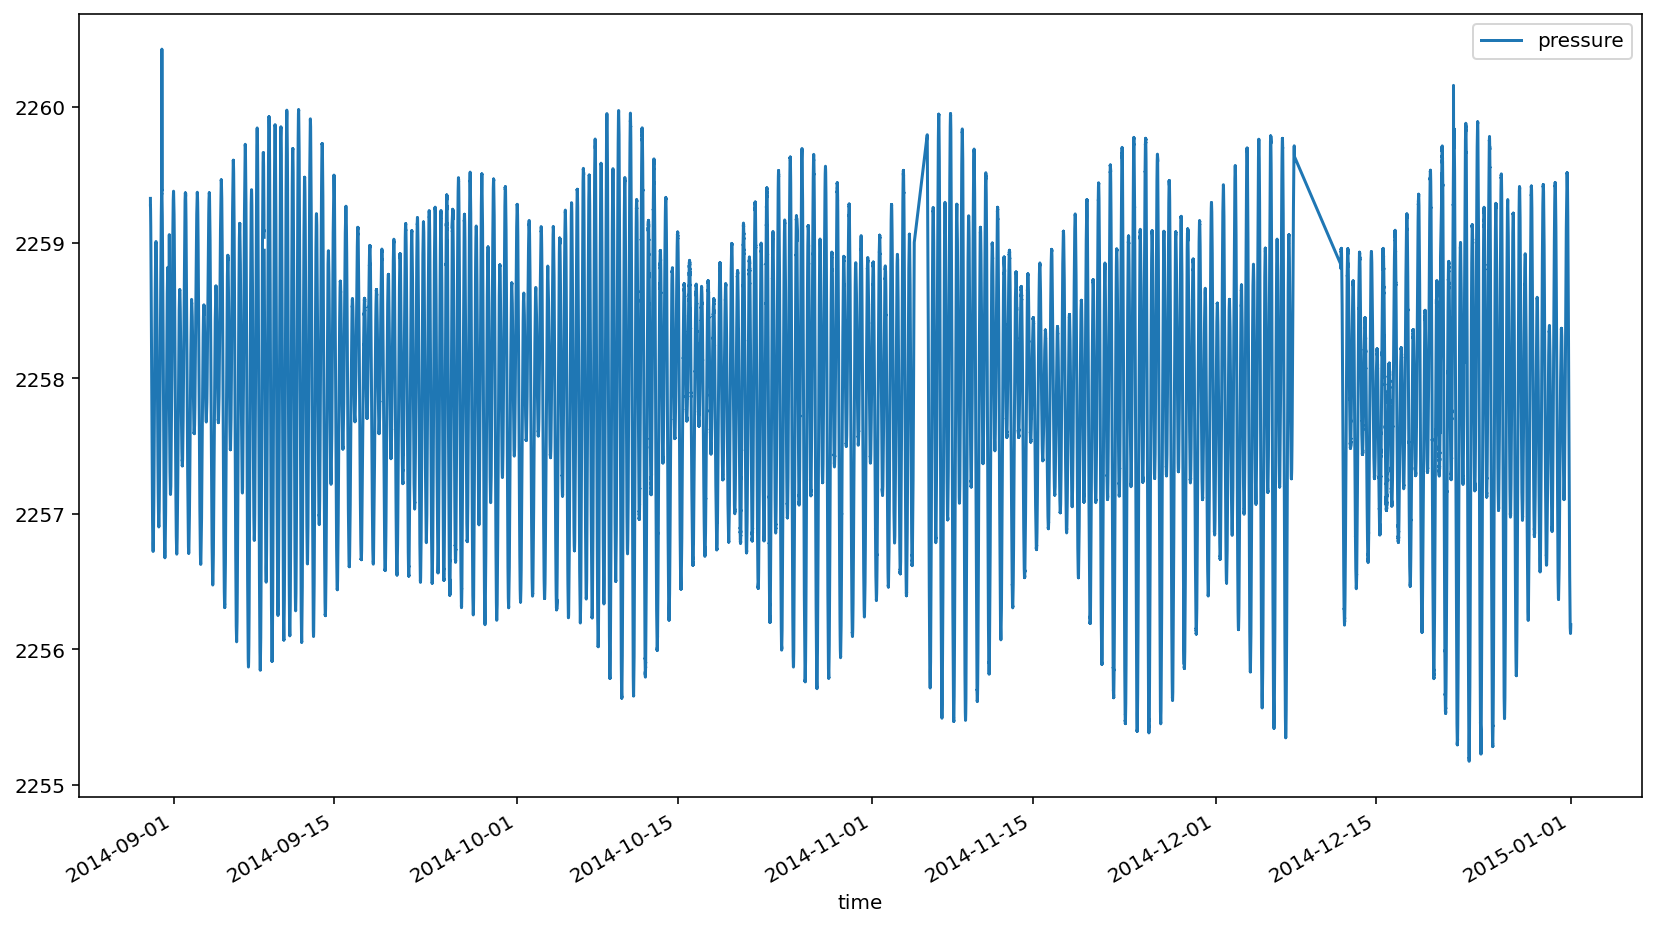

In [34]:
botpt['2014'].plot()

<AxesSubplot:xlabel='time'>

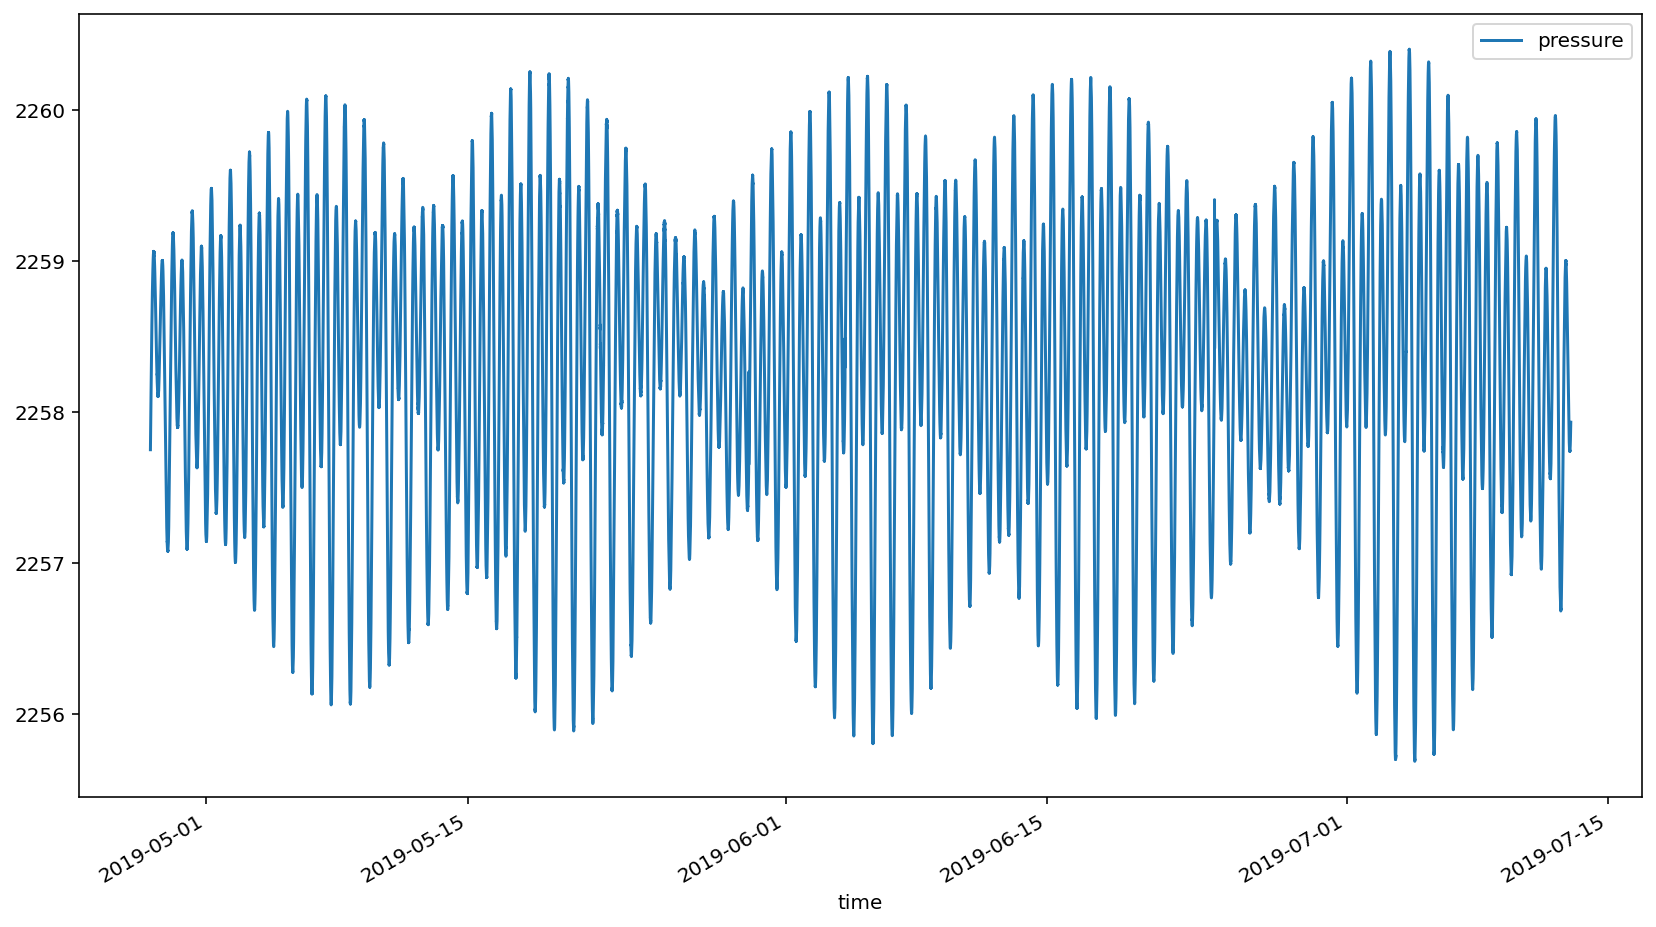

In [56]:
botpt['2019-04-28':'2019-07-12'].plot()

<AxesSubplot:xlabel='time'>

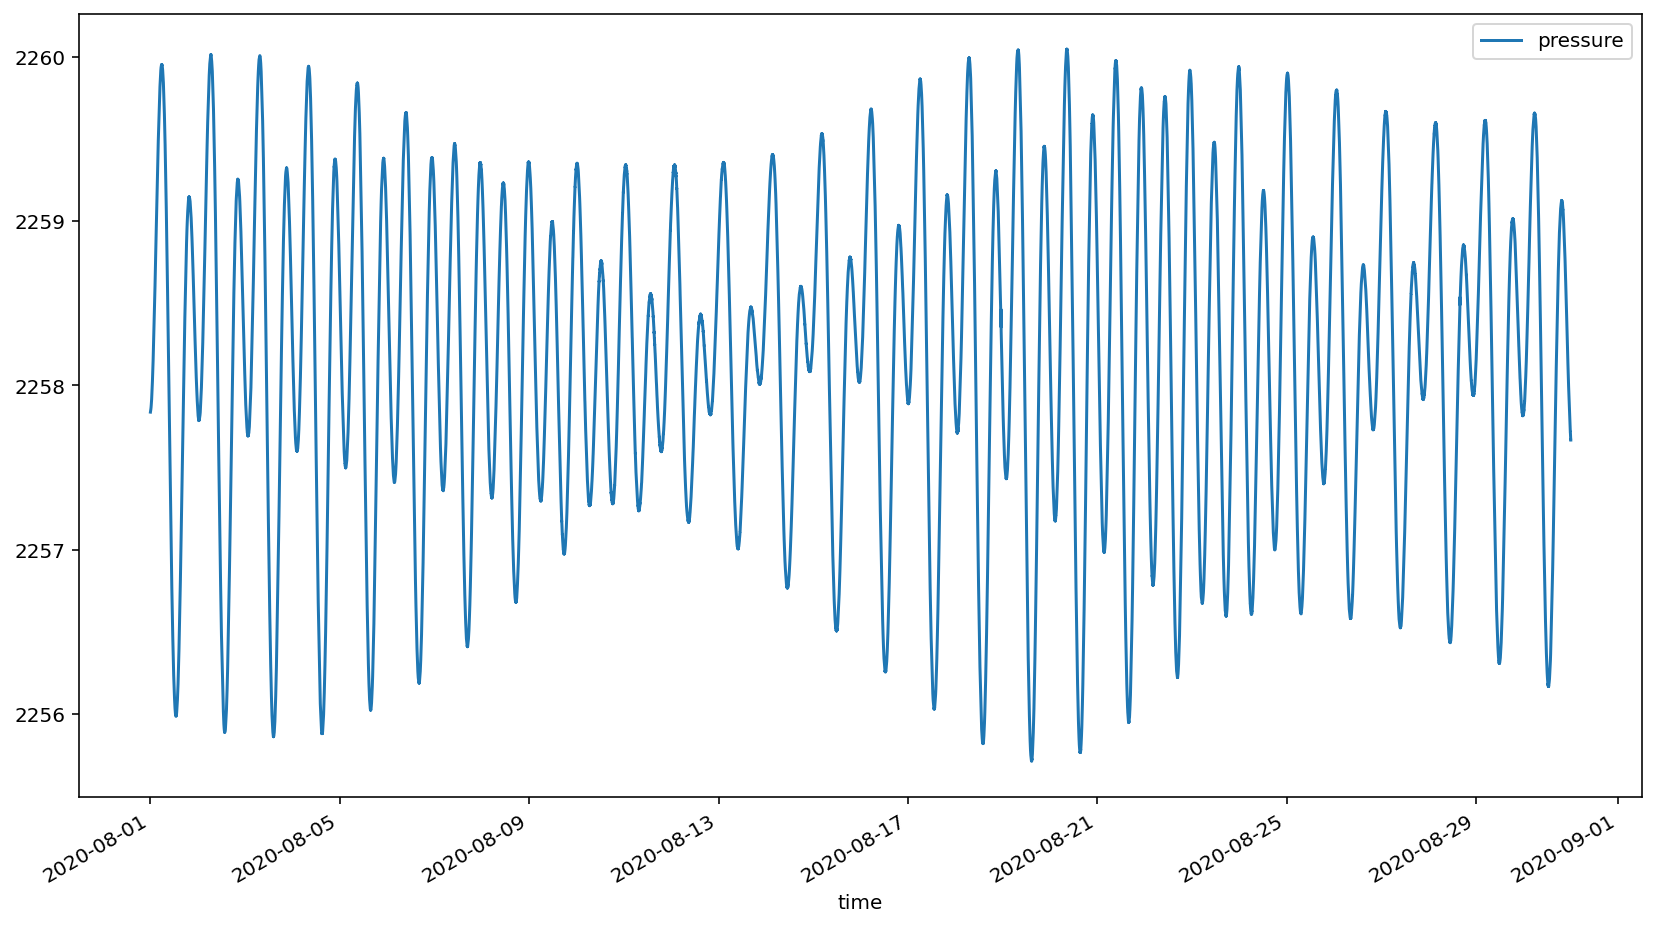

In [43]:
start = pd.Timestamp('2020-08')
botpt[start:start+pd.Timedelta(days=30)].plot()

<AxesSubplot:xlabel='time'>

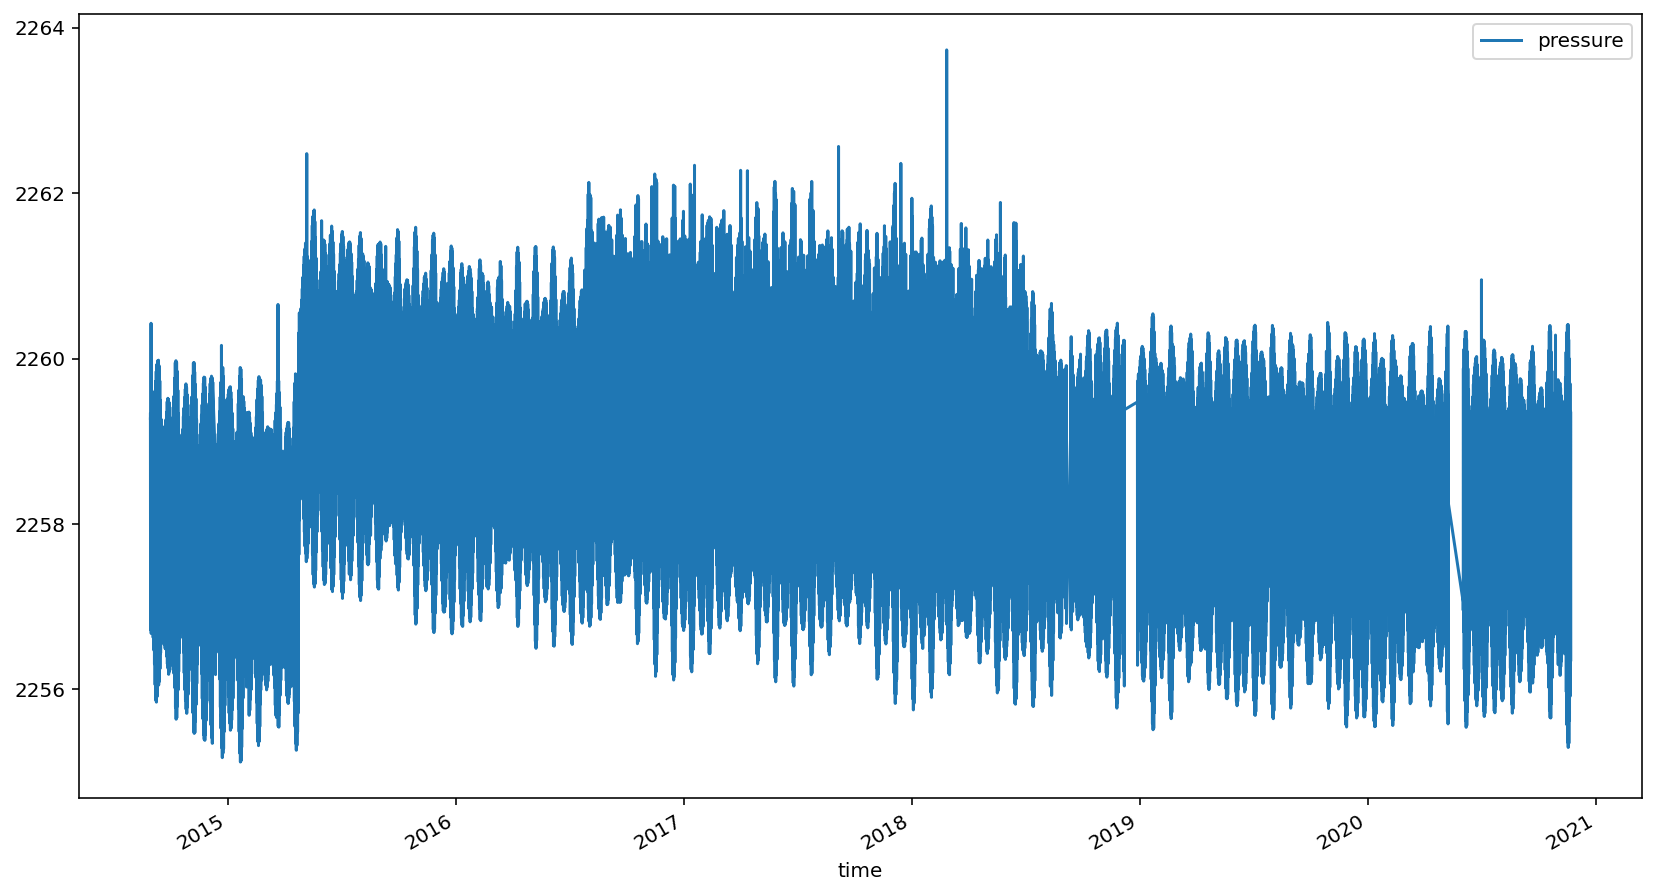

In [59]:
botpt.plot()

<AxesSubplot:xlabel='time', ylabel='pressure'>

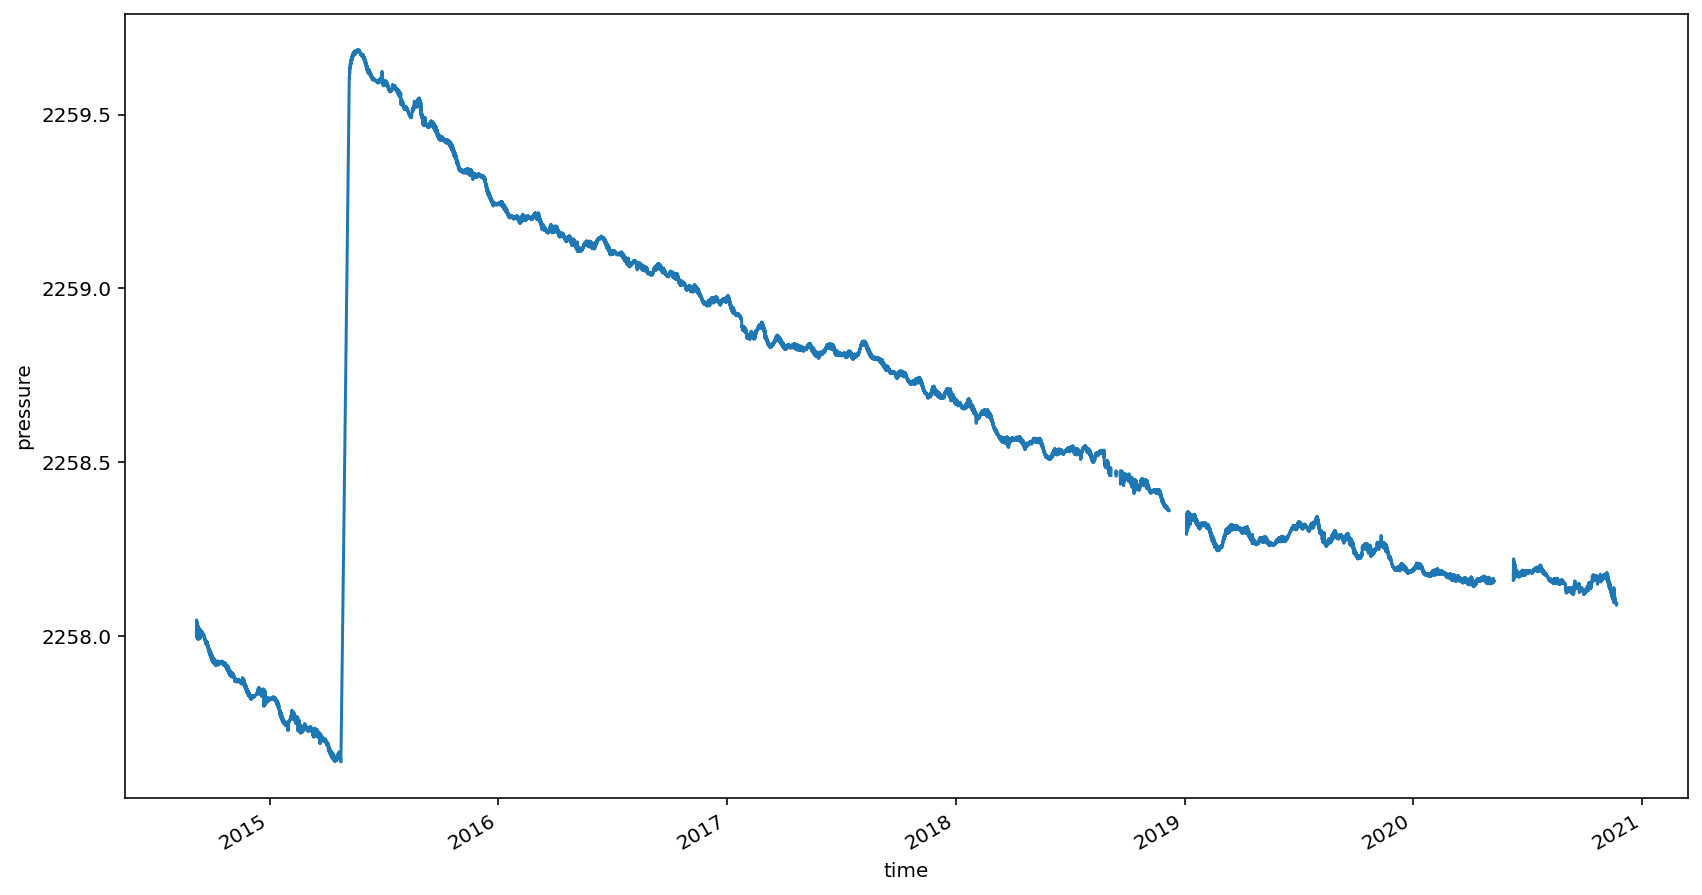

In [117]:
botpt_rolling = botpt.rolling('14D', min_periods = 60*24*7).pressure.mean()
botpt_rolling.plot(ylabel='pressure')

In [ ]:
import hvplot.pandas

In [ ]:
botpt.rolling('14D', min_periods = 60*24*7).pressure.mean()[::60].hvplot(ylabel='pressure')

## Earthquake catalog from the OOI seismic array at Axial Seamount
Here we parse and plot Axial Seamount earthquake catalog data from [William Wilcock's near-real-time automated earthquake location system](http://axial.ocean.washington.edu/). The data we will use is a text file in they HYPO71 output format located here: http://axial.ocean.washington.edu/hypo71.dat.

In [60]:
eqs_url = 'http://axial.ocean.washington.edu/hypo71.dat'

In [61]:
col_names = ['ymd', 'hm', 's', 'lat_deg', 'lat_min', 'lon_deg', 'lon_min',
        'depth', 'MW', 'NWR', 'GAP', 'DMIN',  'RMS',  'ERH', 'ERZ', 'ID', 'PMom', 'SMom']

In [62]:
eqs = pd.read_csv(eqs_url, sep='\s+', header=0, names=col_names)

In [63]:
eqs.head()

,ymd,hm,s,lat_deg,lat_min,lon_deg,lon_min,depth,MW,NWR,GAP,DMIN,RMS,ERH,ERZ,ID,PMom,SMom
0,20150122,0,27.54,45,56.81,129,59.92,0.55,-0.31,7,206,1.2,0.03,0.8,0.4,20830,3.800000e+17,3.900000e+17
1,20150122,8,58.89,45,56.96,129,59.70,0.00,0.02,10,149,1.2,0.09,0.2,0.2,20831,1.900000e+18,7.800000e+17
2,20150122,202,41.04,45,56.47,130,0.89,0.67,-0.03,12,200,0.8,0.03,0.9,0.7,20836,1.400000e+18,7.200000e+17
3,20150122,219,56.90,45,54.93,129,57.59,1.60,0.26,7,325,1.8,0.06,1.4,2.5,20837,3.300000e+18,2.200000e+18
4,20150122,236,7.08,45,56.80,129,59.71,0.51,-0.15,8,160,1.2,0.06,0.5,0.2,20840,6.700000e+17,6.800000e+17


In [64]:
from datetime import datetime
def parse_hypo_date(ymd, hm, s):
    hour = int(hm.zfill(4)[0:2])
    minute = int(hm.zfill(4)[2:])
    second = float(s)
    if second == 60:
        second = 0
        minute += 1
    if minute == 60:
        minute=0
        hour +=1
    eq_date_str = ('%s%02.0f%02.0f%05.2f' % (ymd, hour, minute, second))
    return datetime.strptime(eq_date_str, '%Y%m%d%H%M%S.%f')

In [78]:
eqs = pd.read_csv(eqs_url, sep='\s+', header=0, names=col_names, parse_dates=[[0,1,2]], date_parser=parse_hypo_date)

In [79]:
eqs.head()

,ymd_hm_s,lat_deg,lat_min,lon_deg,lon_min,depth,MW,NWR,GAP,DMIN,RMS,ERH,ERZ,ID,PMom,SMom
0,2015-01-22 00:00:27.540,45,56.81,129,59.92,0.55,-0.31,7,206,1.2,0.03,0.8,0.4,20830,3.800000e+17,3.900000e+17
1,2015-01-22 00:08:58.890,45,56.96,129,59.70,0.00,0.02,10,149,1.2,0.09,0.2,0.2,20831,1.900000e+18,7.800000e+17
2,2015-01-22 02:02:41.040,45,56.47,130,0.89,0.67,-0.03,12,200,0.8,0.03,0.9,0.7,20836,1.400000e+18,7.200000e+17
3,2015-01-22 02:19:56.900,45,54.93,129,57.59,1.60,0.26,7,325,1.8,0.06,1.4,2.5,20837,3.300000e+18,2.200000e+18
4,2015-01-22 02:36:07.080,45,56.80,129,59.71,0.51,-0.15,8,160,1.2,0.06,0.5,0.2,20840,6.700000e+17,6.800000e+17


In [80]:
eqs['lat'] = eqs.lat_deg+eqs.lat_min/60
eqs['lon'] = eqs.lon_deg+eqs.lon_min/60

In [81]:
eqs.head()

,ymd_hm_s,lat_deg,lat_min,lon_deg,lon_min,depth,MW,NWR,GAP,DMIN,RMS,ERH,ERZ,ID,PMom,SMom,lat,lon
0,2015-01-22 00:00:27.540,45,56.81,129,59.92,0.55,-0.31,7,206,1.2,0.03,0.8,0.4,20830,3.800000e+17,3.900000e+17,45.946833,129.998667
1,2015-01-22 00:08:58.890,45,56.96,129,59.70,0.00,0.02,10,149,1.2,0.09,0.2,0.2,20831,1.900000e+18,7.800000e+17,45.949333,129.995000
2,2015-01-22 02:02:41.040,45,56.47,130,0.89,0.67,-0.03,12,200,0.8,0.03,0.9,0.7,20836,1.400000e+18,7.200000e+17,45.941167,130.014833
3,2015-01-22 02:19:56.900,45,54.93,129,57.59,1.60,0.26,7,325,1.8,0.06,1.4,2.5,20837,3.300000e+18,2.200000e+18,45.915500,129.959833
4,2015-01-22 02:36:07.080,45,56.80,129,59.71,0.51,-0.15,8,160,1.2,0.06,0.5,0.2,20840,6.700000e+17,6.800000e+17,45.946667,129.995167


In [82]:
eqs.rename(columns={'ymd_hm_s': 'time', 'MW': 'mw'}, inplace=True)

In [83]:
eqs.set_index('time', inplace=True)

In [84]:
eqs.head()

,lat_deg,lat_min,lon_deg,lon_min,depth,mw,NWR,GAP,DMIN,RMS,ERH,ERZ,ID,PMom,SMom,lat,lon
time,,,,,,,,,,,,,,,,,
2015-01-22 00:00:27.540,45,56.81,129,59.92,0.55,-0.31,7,206,1.2,0.03,0.8,0.4,20830,3.800000e+17,3.900000e+17,45.946833,129.998667
2015-01-22 00:08:58.890,45,56.96,129,59.70,0.00,0.02,10,149,1.2,0.09,0.2,0.2,20831,1.900000e+18,7.800000e+17,45.949333,129.995000
2015-01-22 02:02:41.040,45,56.47,130,0.89,0.67,-0.03,12,200,0.8,0.03,0.9,0.7,20836,1.400000e+18,7.200000e+17,45.941167,130.014833
2015-01-22 02:19:56.900,45,54.93,129,57.59,1.60,0.26,7,325,1.8,0.06,1.4,2.5,20837,3.300000e+18,2.200000e+18,45.915500,129.959833
2015-01-22 02:36:07.080,45,56.80,129,59.71,0.51,-0.15,8,160,1.2,0.06,0.5,0.2,20840,6.700000e+17,6.800000e+17,45.946667,129.995167


In [86]:
eqs = eqs[['lat', 'lon', 'depth', 'mw']]

In [87]:
eqs.head()

,lat,lon,depth,mw
time,,,,
2015-01-22 00:00:27.540,45.946833,129.998667,0.55,-0.31
2015-01-22 00:08:58.890,45.949333,129.995000,0.00,0.02
2015-01-22 02:02:41.040,45.941167,130.014833,0.67,-0.03
2015-01-22 02:19:56.900,45.915500,129.959833,1.60,0.26
2015-01-22 02:36:07.080,45.946667,129.995167,0.51,-0.15


In [76]:
len(eqs)

142129

<AxesSubplot:xlabel='time'>

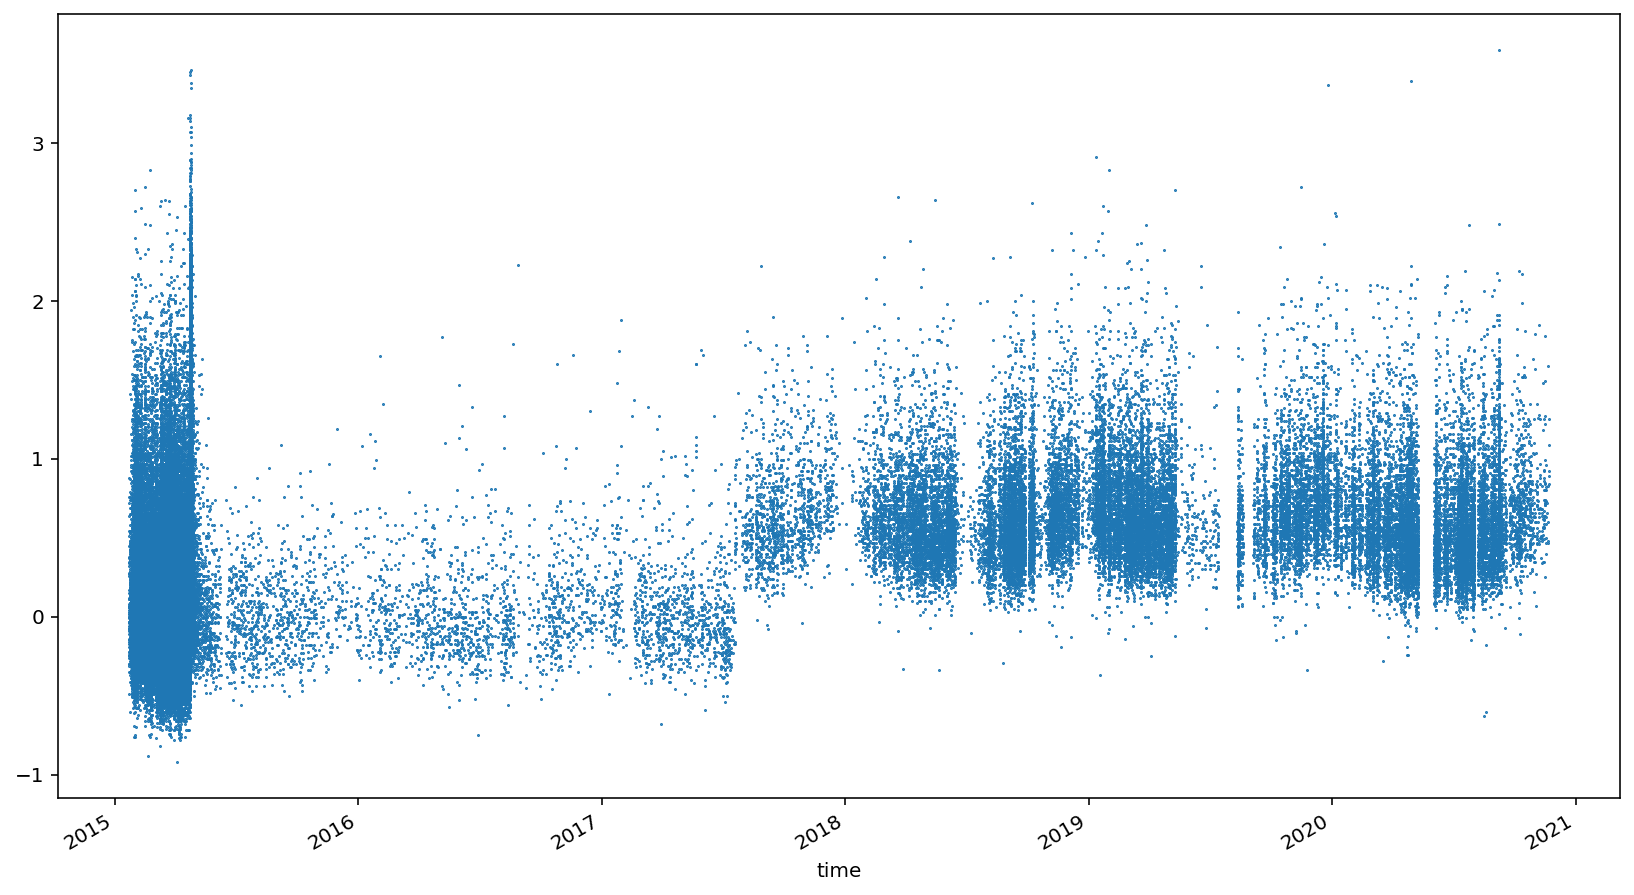

In [98]:
eqs.mw.plot(marker='.', linestyle='', markersize=1)

In [116]:
daily_count = eqs.mw.resample('1D').agg('count')
daily_count.head()

time
2015-01-22     67
2015-01-23     72
2015-01-24    152
2015-01-25     99
2015-01-26    348
Freq: D, Name: mw, dtype: int64

(0.0, 3000.0)

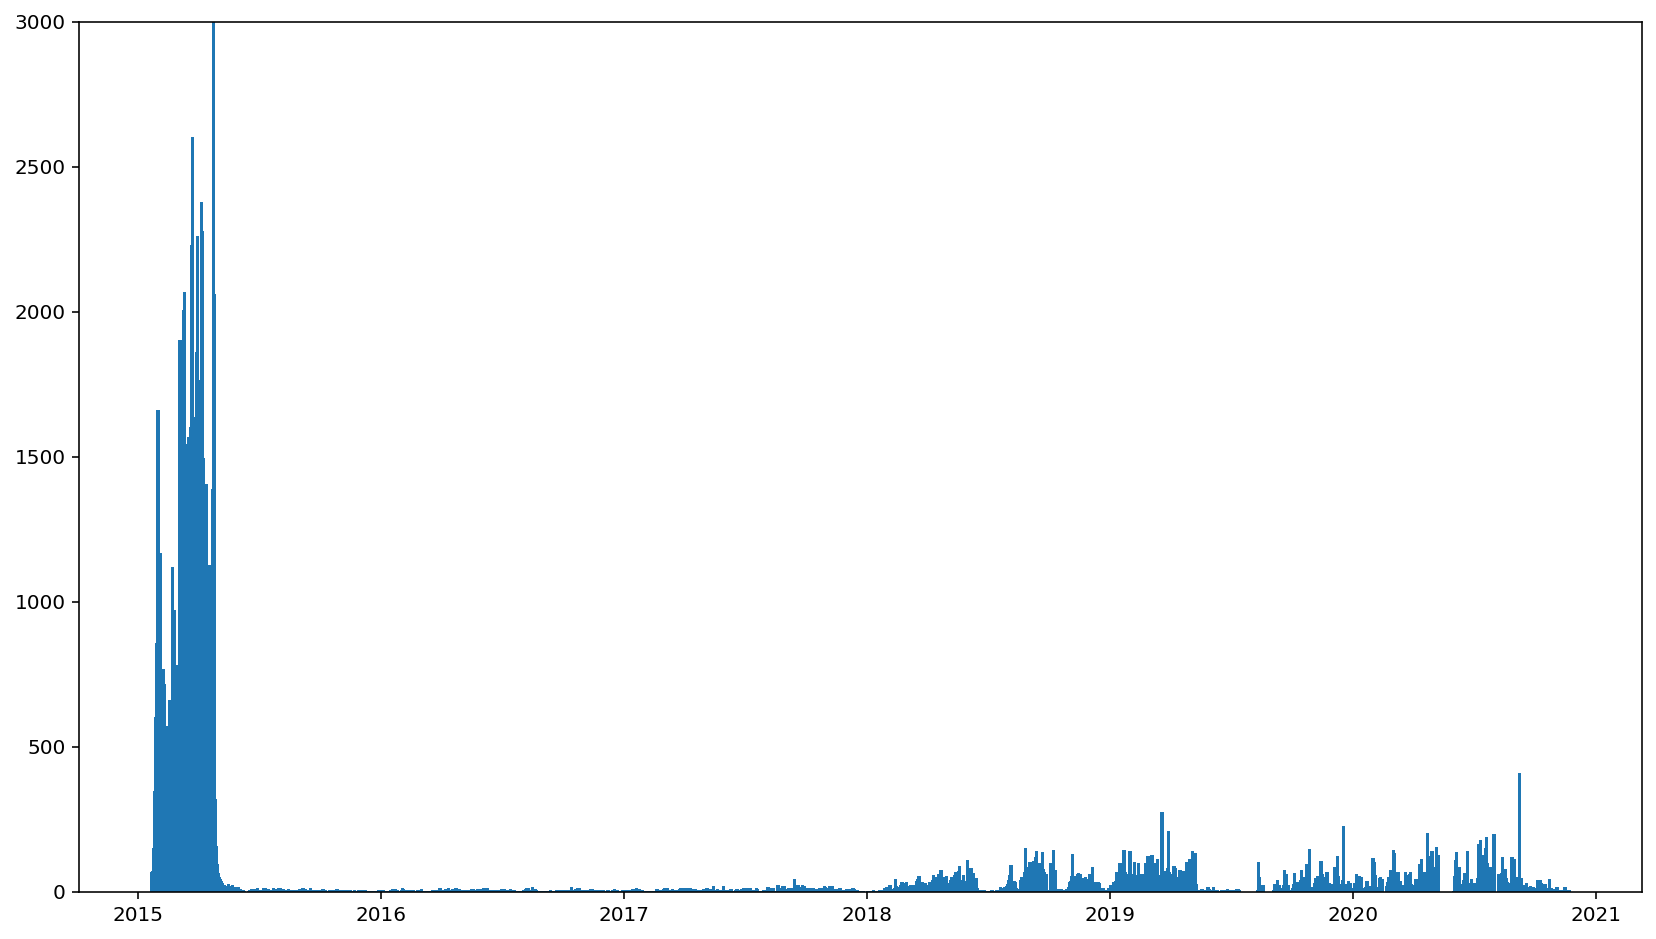

In [125]:
fig, ax1 = plt.subplots()
ax1.bar(daily_count.index, daily_count.values, width=5)
ax1.set_ylim(ymax=3000)

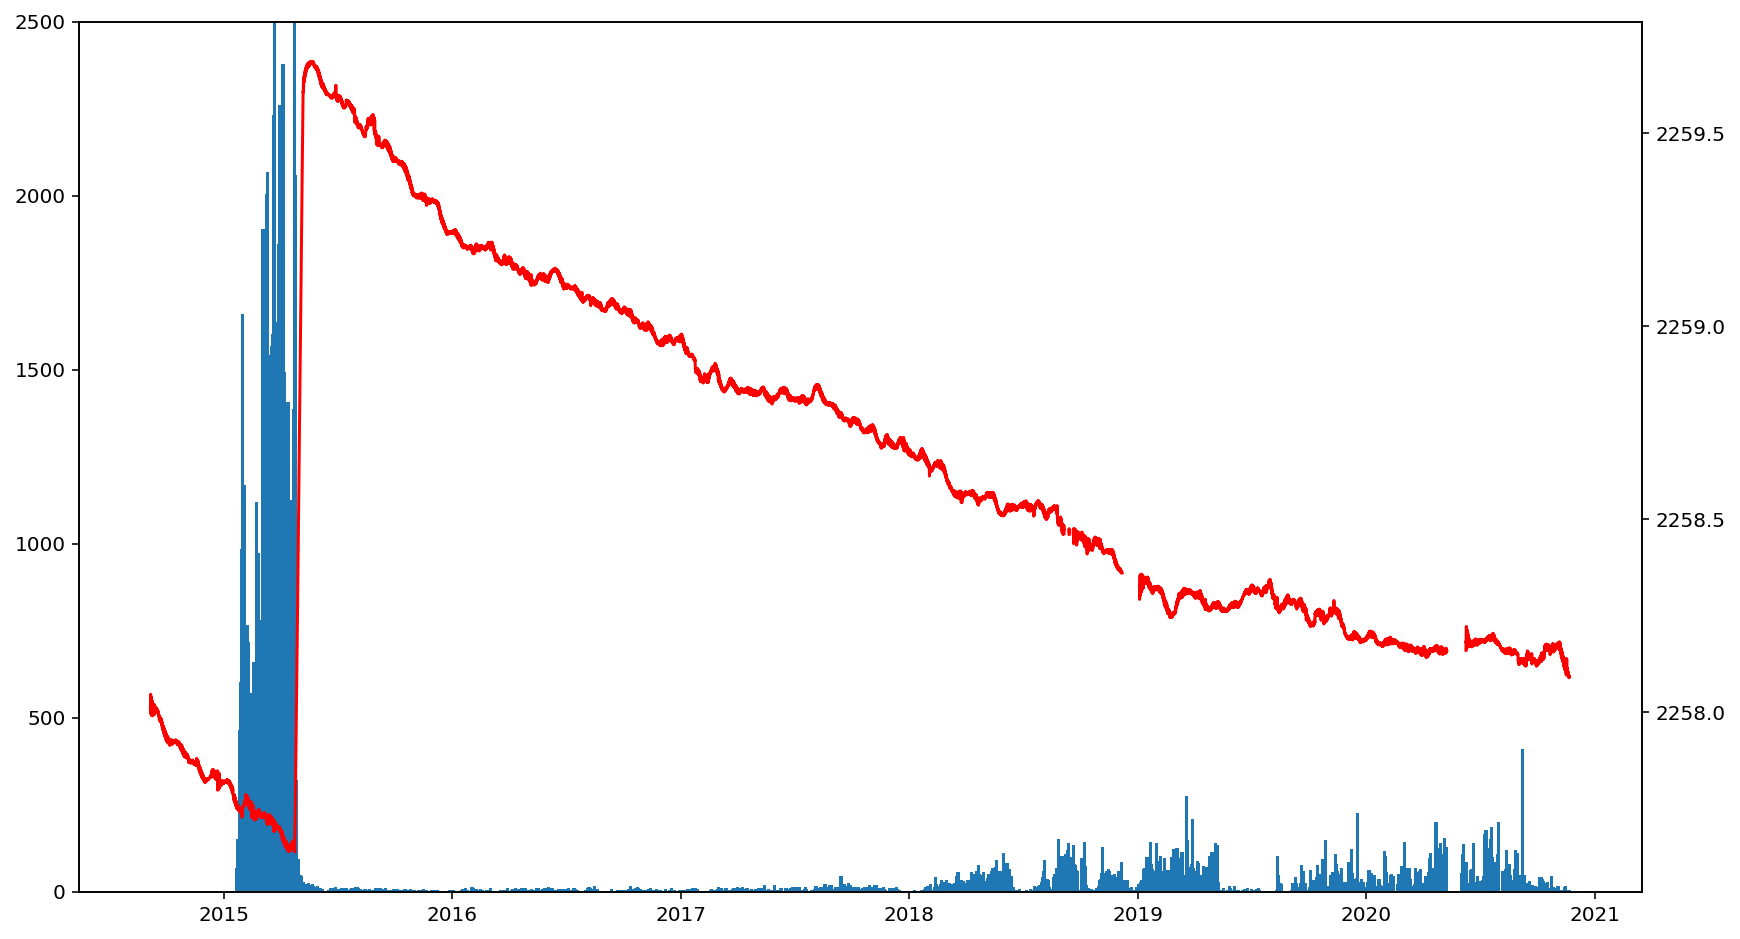

In [128]:
fig, ax1 = plt.subplots()
ax1.bar(daily_count.index, daily_count.values, width=5)
ax1.set_ylim(ymax=2500)
ax2 = ax1.twinx()
ax2.plot(botpt_rolling, color='r')

Text(0, 0.5, 'pressure')

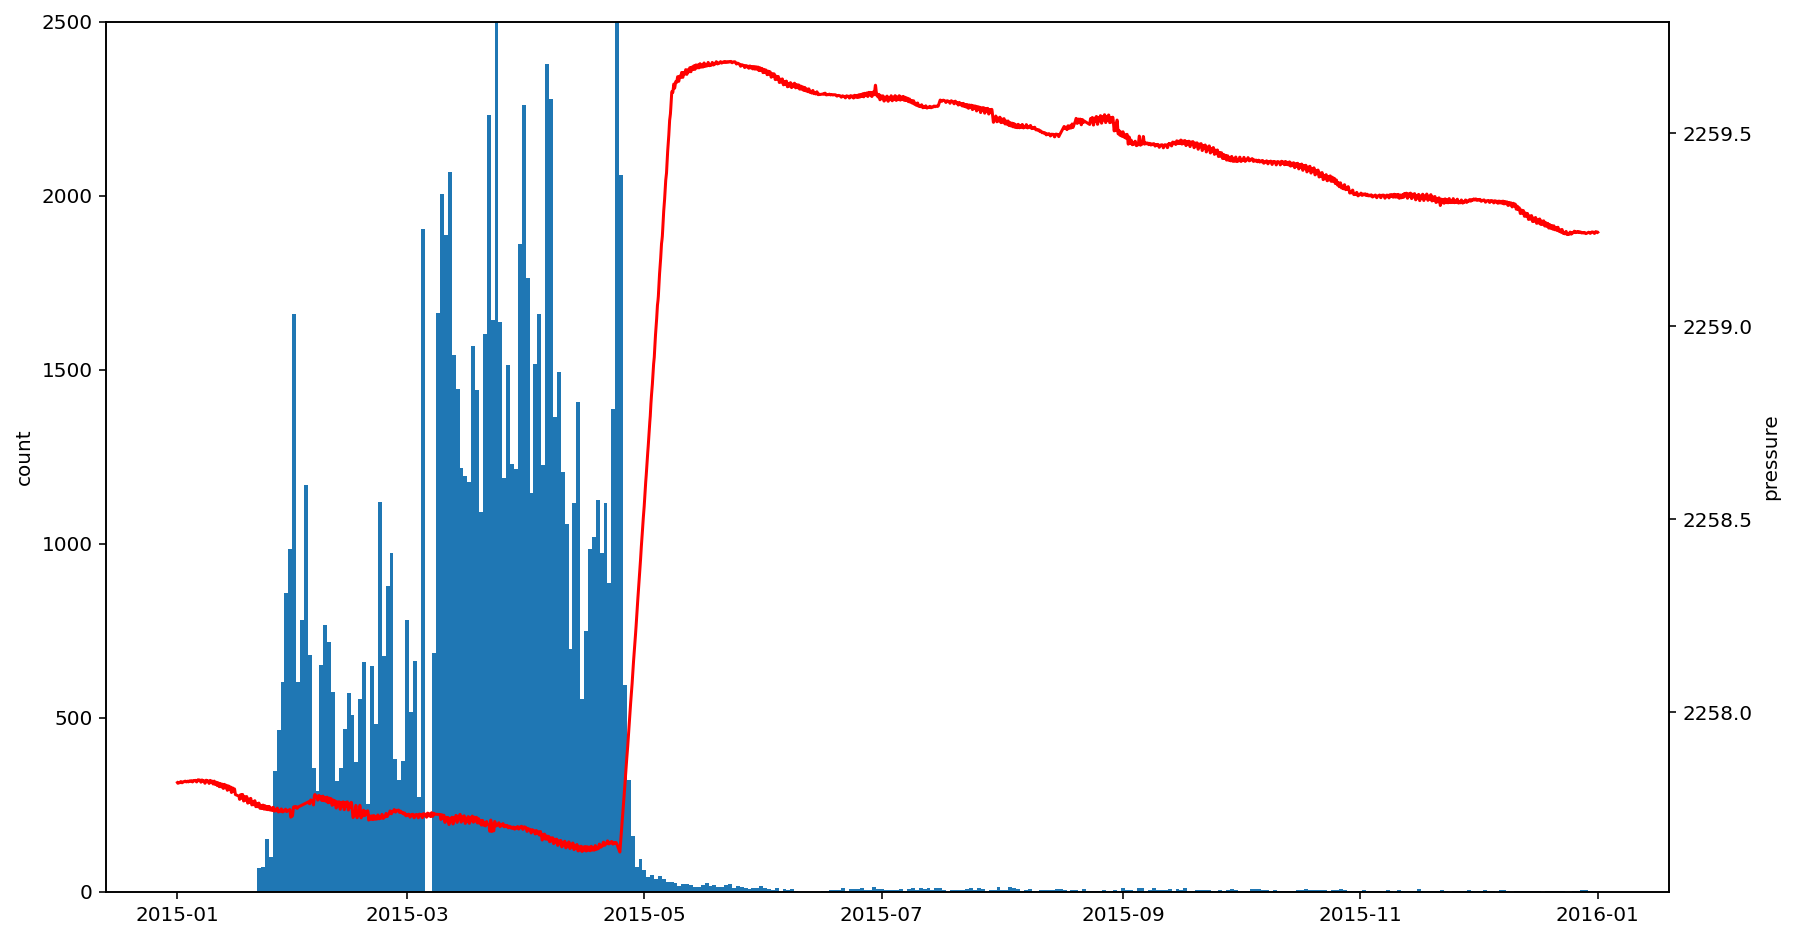

In [143]:
fig, ax1 = plt.subplots()
ax1.bar(daily_count['2015'].index, daily_count['2015'].values, width=1)
ax1.set_ylim(ymax=2500)
ax1.set_ylabel('count')

ax2 = ax1.twinx()
ax2.plot(botpt_rolling['2015'], color='r')
ax2.set_ylabel('pressure')

## Scratch scratch

In [ ]:
df = pd.DataFrame(index=test.groupby(test.index.date).count().index)
df['count'] = test.groupby(test.index.date).count().lat

In [ ]:
counts = pd.DataFrame(index=test.resample('1D').agg('count').index)
#counts['count'] = test.resample('1D').agg('count')

In [ ]:
test.nlargest(100, 'MW').plot.scatter(x='lon', y='lat', s='MW')

In [ ]:
test['2020-01-01':].plot.scatter(x = 'lon', y = 'lat', c = 'depth', s='MW', cmap='magma')

In [ ]:
test.hvplot.scatter(x = 'lon', y = 'lat', c='depth', datashade=True, dynspread=True)

In [ ]:
eqs = eqs.rename(columns={''}
botpt = botpt.rename(columns={'botpres':'pressure'})

In [ ]:
eqs = pd.read_csv(eq_url, sep='\s+', header=0, names=col_names, parse_dates=[[0,1,2]], date_parser=parse_hypo_date)

In [ ]:
url = 'http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-rs03int1-mj03c-10-trhpha301.csv?time%2Ctrhphte_abs%2Ctrhphte_abs_qc_agg%2Cz&time%3E%3D2014-09-27T06%3A46%3A00Z&time%3C%3D2020-11-21T05%3A47%3A00Z'

In [ ]:
test2 = pd.read_csv(url, parse_dates=True, index_col='time', skiprows=[1])

In [ ]:
test2.nsmallest(1000, 'trhphte_abs')

In [ ]:
test2.iloc[-200000:].hvplot(y='trhphte_abs', marker='.')

In [ ]:
url = 'http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-rs03int2-mj03d-06-botpta303.nc?time%2Cbotpres%2Cbotpres_qc_agg%2Cz&time%3E%3D2014-08-29T23%3A17%3A00Z&time%3C%3D2020-11-21T06%3A00%3A00Z'